# Library

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dataset

In [ ]:
file = "Study Case DA.xlsx"

employees = pd.read_excel(file, sheet_name="employees")
performance = pd.read_excel(file, sheet_name="performance_yearly")
competencies = pd.read_excel(file, sheet_name="competencies_yearly")
psych = pd.read_excel(file, sheet_name="profiles_psych")
strengths = pd.read_excel(file, sheet_name="strengths")
papi = pd.read_excel(file, sheet_name="papi_scores")
pillars = pd.read_excel(file, sheet_name="dim_competency_pillars")

In [ ]:
df = performance.merge(employees, on="employee_id", how="left")

comp_avg = competencies.groupby("employee_id")["score"].mean().reset_index().rename(columns={"score":"avg_competency"})
df = df.merge(comp_avg, on="employee_id", how="left")

df = df.merge(psych, on="employee_id", how="left")

strength_count = strengths.groupby("employee_id")["theme"].nunique().reset_index().rename(columns={"theme":"num_strengths"})
df = df.merge(strength_count, on="employee_id", how="left")

In [ ]:
df

,employee_id,rating,year,fullname,nip,company_id,area_id,position_id,department_id,division_id,...,avg_competency,pauli,faxtor,disc,disc_word,mbti,iq,gtq,tiki,num_strengths
0,EMP100000,2.0,2021,Rendra Pratama,806137,1,4,1,6,3,...,4.531915,86,75,SI,Steadiness-Influencer,NaN,94.0,33.0,2,13
1,EMP100001,NaN,2021,Wulan Setiawan,476388,4,4,4,5,5,...,3.368421,48,52,DS,Dominant-Steadiness,INTP,94.0,17.0,3,14
2,EMP100002,2.0,2021,Julia Jatmiko Situmorang,941921,1,3,5,1,1,...,3.045455,66,38,DC,Dominant-Conscientious,NaN,109.0,20.0,3,9
3,EMP100003,NaN,2021,Oka Halim,751615,1,3,4,2,1,...,2.416667,39,63,SI,Steadiness-Influencer,ENTJ,85.0,39.0,3,13
4,EMP100004,3.0,2021,Dwi Pratama,443809,3,4,6,5,3,...,3.086957,75,100,NaN,Steadiness-Conscientious,INTJ,134.0,21.0,9,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10045,DUP1942,5.0,2025,Dewi Fadillah Hidayat,325441,4,4,1,4,1,...,2.833333,55,54,CD,Conscientious-Dominant,ISFP,NaN,NaN,8,14
10046,DUP2096,3.0,2025,Putri Wibowo,149080,3,3,4,4,2,...,3.446809,27,62,SD,Steadiness-Dominant,ISFJ,NaN,NaN,4,12
10047,DUP4177,2.0,2025,Adi Ginting,116115,4,2,6,4,4,...,3.239130,41,22,DS,Dominant-Steadiness,ENTJ,NaN,NaN,8,13
10048,DUP9801,5.0,2025,Ayu Kusuma Santoso,889823,2,3,3,3,1,...,3.394737,37,64,SC,Steadiness-Conscientious,ISTJ,131.0,28.0,7,11


# Informasi Dataset

In [ ]:
df.describe()
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10050 entries, 0 to 10049
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   employee_id              10050 non-null  object 
 1   rating                   8942 non-null   float64
 2   year                     10050 non-null  int64  
 3   fullname                 10050 non-null  object 
 4   nip                      10050 non-null  int64  
 5   company_id               10050 non-null  int64  
 6   area_id                  10050 non-null  int64  
 7   position_id              10050 non-null  int64  
 8   department_id            10050 non-null  int64  
 9   division_id              10050 non-null  int64  
 10  directorate_id           10050 non-null  int64  
 11  grade_id                 10050 non-null  int64  
 12  education_id             10050 non-null  int64  
 13  major_id                 10050 non-null  int64  
 14  years_of_service_month

,0
employee_id,0
rating,1108
year,0
fullname,0
nip,0
company_id,0
area_id,0
position_id,0
department_id,0
division_id,0


# Distribusi IQ Antara Top dan Non-Top & Korelasi Antar Variabel Numerik

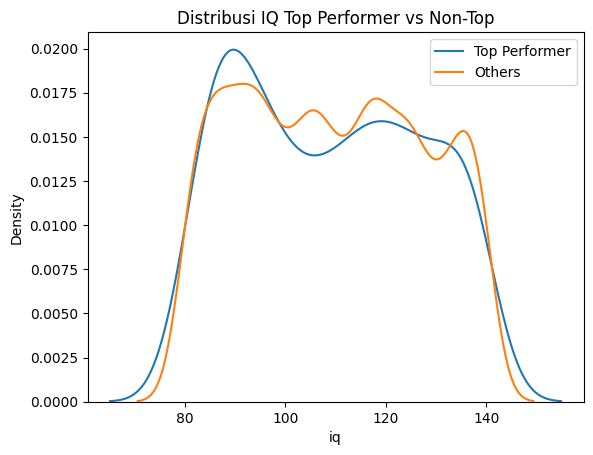

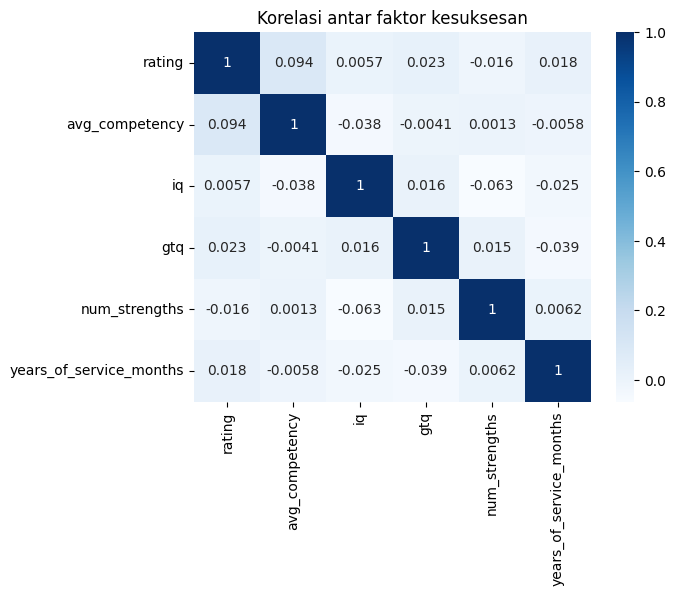

In [ ]:
top = df[df["rating"] == 5]
others = df[df["rating"] < 5]

# Distribusi IQ antara top dan non-top
sns.kdeplot(top["iq"], label="Top Performer")
sns.kdeplot(others["iq"], label="Others")
plt.legend()
plt.title("Distribusi IQ Top Performer vs Non-Top")
plt.show()

# Korelasi antar variabel numerik
corr = df[["rating", "avg_competency", "iq", "gtq", "num_strengths", "years_of_service_months"]].corr()
sns.heatmap(corr, annot=True, cmap="Blues")
plt.title("Korelasi antar faktor kesuksesan")
plt.show()

# Rata-Rata Kompetensi (avg_competency) Berdasarkan Rating

<Axes: xlabel='rating', ylabel='avg_competency'>

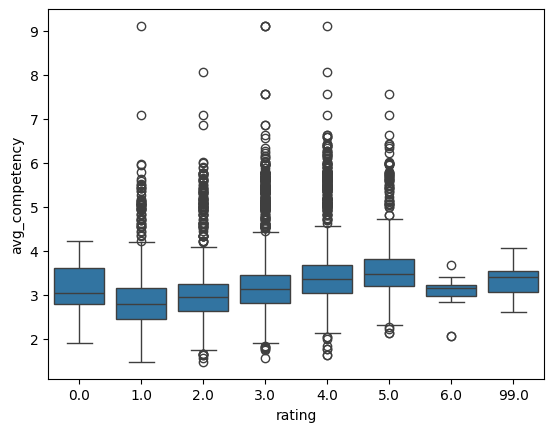

In [ ]:
sns.boxplot(data=df, x="rating", y="avg_competency")

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_cols = ["avg_competency", "gtq", "years_of_service_months", "iq", "num_strengths"]
df_scaled = df.copy()
df_scaled[scaled_cols] = scaler.fit_transform(df[scaled_cols])

In [ ]:
df_scaled["success_score"] = (
    0.094 * df_scaled["avg_competency"] +
    0.023 * df_scaled["gtq"] +
    0.018 * df_scaled["years_of_service_months"] +
    0.0057 * df_scaled["iq"] -
    0.016 * df_scaled["num_strengths"]
)

In [ ]:
corr = df_scaled["success_score"].corr(df_scaled["rating"])
print("Korelasi Success Score terhadap Rating:", corr)

Korelasi Success Score terhadap Rating: 0.10734237686670312


# Regresi

In [ ]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Kolom yang dipakai untuk prediksi
cols = ["avg_competency", "gtq", "years_of_service_months", "iq", "num_strengths"]

# Hapus baris yang ratingnya kosong
df_clean = df_scaled.dropna(subset=["rating"]).copy()

# Isi NaN pada kolom fitur dengan nilai rata-rata (mean)
imputer = SimpleImputer(strategy="mean")
df_clean[cols] = imputer.fit_transform(df_clean[cols])

# Siapkan data X dan y
X = df_clean[cols]
y = df_clean["rating"]

# Latih model regresi linear
model = LinearRegression()
model.fit(X, y)

# Prediksi & evaluasi
y_pred = model.predict(X)
print("R² Score:", r2_score(y, y_pred))
print("Koefisien:", dict(zip(X.columns, model.coef_)))

R² Score: 0.010041444659457666
Koefisien: {'avg_competency': np.float64(2.663086526184819), 'gtq': np.float64(0.41473164953157965), 'years_of_service_months': np.float64(0.3401239446147102), 'iq': np.float64(0.07727881621257343), 'num_strengths': np.float64(-0.22982528853861878)}


In [ ]:
import numpy as np
coef_df = pd.DataFrame({
    "Faktor": X.columns,
    "Koefisien": model.coef_,
    "Arah Pengaruh": np.where(model.coef_ > 0, "positif", "negatif")
})
print(coef_df)

                    Faktor  Koefisien Arah Pengaruh
0           avg_competency   2.663087       positif
1                      gtq   0.414732       positif
2  years_of_service_months   0.340124       positif
3                       iq   0.077279       positif
4            num_strengths  -0.229825       negatif


# Korelasi 10 Variabel Teratas Terhadap Rating

🔹 10 Variabel dengan Korelasi Terkuat terhadap Rating:

avg_competency             0.094295
gtq                        0.023353
years_of_service_months    0.018167
nip                        0.018033
faxtor                     0.016949
department_id              0.010735
major_id                   0.005883
iq                         0.005692
pauli                      0.004866
division_id                0.003019
Name: rating, dtype: float64


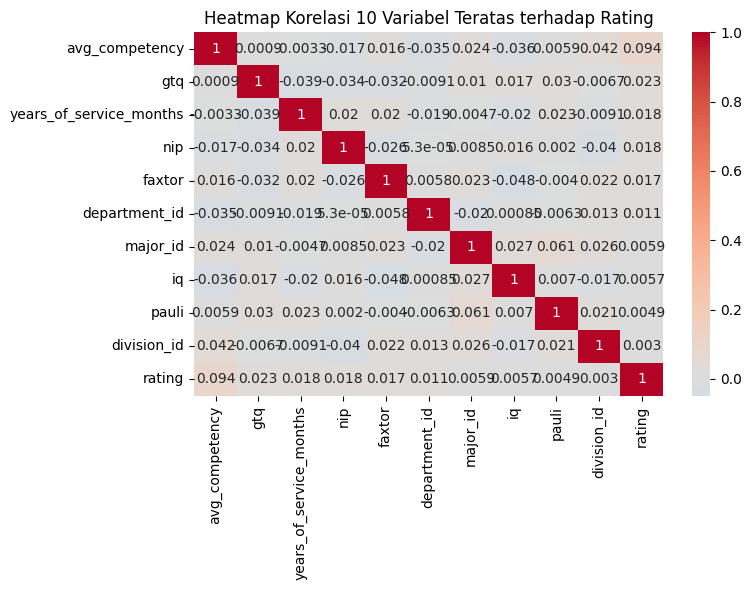

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

numeric_df = df.select_dtypes(include=['float64', 'int64'])

numeric_df = numeric_df.dropna(subset=['rating'])

corr_matrix = numeric_df.corr(method='pearson')

corr_with_rating = corr_matrix['rating'].sort_values(ascending=False)

top_corr = corr_with_rating[1:11]
print("🔹 10 Variabel dengan Korelasi Terkuat terhadap Rating:\n")
print(top_corr)

plt.figure(figsize=(8, 6))
sns.heatmap(
    numeric_df[top_corr.index.to_list() + ['rating']].corr(),
    annot=True, cmap='coolwarm', center=0
)
plt.title('Heatmap Korelasi 10 Variabel Teratas terhadap Rating', fontsize=12)
plt.tight_layout()
plt.show()

In [ ]:
df_scaled["success_label"] = pd.qcut(df_scaled["success_score"], q=3, labels=["Low", "Medium", "High"])

In [ ]:
pd.crosstab(df_scaled["rating"], df_scaled["success_label"], normalize="index")

success_label,Low,Medium,High
rating,,,
0.0,0.384615,0.384615,0.230769
1.0,0.551282,0.254579,0.194139
2.0,0.447627,0.325696,0.226678
3.0,0.336339,0.358683,0.304978
4.0,0.236508,0.349735,0.413757
5.0,0.191265,0.283133,0.525602
6.0,0.400000,0.400000,0.200000
99.0,0.000000,0.400000,0.600000
